# Quantum Computing Lab 2.2
## FA1

In [1]:
from qiskit import QuantumCircuit
from math import pi

qc = QuantumCircuit(4)

qc.u(pi/8, pi/16, pi/4, 0)
qc.x(2)
qc.x(3)

qc.swap(1, 2)
qc.swap(2, 3)

qc.ccx(0, 2, 3)
qc.cx(3, 0)

# qc.draw("mpl")
qc.draw()

┌─────────────────┐           ┌───┐
q_0: ┤ U(π/8,π/16,π/4) ├────────■──┤ X ├
     └─────────────────┘        │  └─┬─┘
q_1: ────────────────────X──────┼────┼──
            ┌───┐        │      │    │  
q_2: ───────┤ X ├────────X──X───■────┼──
            ├───┤           │ ┌─┴─┐  │  
q_3: ───────┤ X ├───────────X─┤ X ├──■──
            └───┘             └───┘

In [2]:
from sympy import symbols, cos, sin, exp, I, Matrix, sqrt, pi, kronecker_product, eye


def U(theta, phi, lam):
    return Matrix([
        [cos(theta/2), -exp(I * lam) * sin(theta/2)],
        [exp(I * phi) * sin(theta/2), exp(I * (phi + lam)) * cos(theta/2)]
    ])


IDENTITY = Matrix([[1, 0], [0, 1]])

HADAMARD = (1/sqrt(2)) * Matrix([[1, 1], [1, -1]])

X = Matrix([[0, 1], [1, 0]])

SWAP = Matrix([[1, 0, 0, 0],
               [0, 0, 1, 0],
               [0, 1, 0, 0],
               [0, 0, 0, 1]])

U_my = U(pi / 8, pi / 16, pi / 4)


# print(U_my)
# print(U_my.evalf())

In [3]:
# Flip q_3 when |1 q_1 1 q_3>
CX_0 = eye(16)

CX_0[10,10], CX_0[10, 11] = 0, 1
CX_0[11,10], CX_0[11, 11] = 1, 0

CX_0[14,14], CX_0[14,15] = 0, 1
CX_0[15,14], CX_0[15,15] = 1, 0

# CX_0

In [4]:
# Flip q_0 when |q_0 q_1 q_2 1>
CX_1 = eye(16)
pairs = [(1,9), (3,11), (5,13), (7,15)]

for (i, j) in pairs:
    CX_1[i, i] = 0
    CX_1[j, j] = 0

    CX_1[i, j] = 1
    CX_1[j, i] = 1
# CX_1

In [5]:
result = kronecker_product(U_my, IDENTITY, X, HADAMARD) * kronecker_product(IDENTITY, IDENTITY, SWAP) * kronecker_product(IDENTITY, SWAP, IDENTITY) * CX_0 * CX_1
result.simplify()
result

Matrix([
[                                0,   -sqrt(2)*exp(I*pi/4)*sin(pi/16)/2,                                 0,                                   0,                                  0,    -sqrt(2)*exp(I*pi/4)*sin(pi/16)/2,                                  0,                                    0,                                   0,              sqrt(2)*cos(pi/16)/2,                                   0,                                 0,                                    0,               sqrt(2)*cos(pi/16)/2,                                    0,                                  0],
[                                0,   -sqrt(2)*exp(I*pi/4)*sin(pi/16)/2,                                 0,                                   0,                                  0,     sqrt(2)*exp(I*pi/4)*sin(pi/16)/2,                                  0,                                    0,                                   0,              sqrt(2)*cos(pi/16)/2,                                   0,    

In [6]:
import sympy as sp


eigs = HADAMARD.eigenvects()
# eigs = result.eigenvects()

for idx, (eigenval, multiplicity, eigenvecs) in enumerate(eigs):
    print(f"Eigenvalue {idx}: {eigenval}, multiplicity: {multiplicity}")
    for v in eigenvecs:
        print(f"  Eigenvector: {v}")

    phase = sp.arg(eigenval)
    print(f"  Phase (argument) of eigenvalue: {phase}")

Eigenvalue 0: -1, multiplicity: 1
  Eigenvector: Matrix([[1 - sqrt(2)], [1]])
  Phase (argument) of eigenvalue: pi
Eigenvalue 1: 1, multiplicity: 1
  Eigenvector: Matrix([[1 + sqrt(2)], [1]])
  Phase (argument) of eigenvalue: 0


## FA2

In [7]:
from qiskit import QuantumCircuit
from scipy.linalg import eigh
from qiskit.quantum_info import Operator


qc = QuantumCircuit(3)

qc.x(1)

qc.draw("mpl")

matrix = Operator(qc).data
eigenvalues, eigenvectors = eigh(matrix)
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors (each column is an eigenvector):")
print(eigenvectors)

Eigenvalues:
[-1. -1. -1. -1.  1.  1.  1.  1.]

Eigenvectors (each column is an eigenvector):
[[ 0.70710678+0.j  0.        +0.j  0.        +0.j  0.        +0.j
  -0.70710678-0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j -0.70710678+0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.70710678+0.j  0.        +0.j]
 [-0.70710678+0.j  0.        +0.j  0.        +0.j  0.        +0.j
  -0.70710678+0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.70710678-0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.70710678+0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.        +0.j
   0.        +0.j -0.70710678-0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j -0.70710678+0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j -0.70710678+0.j  0.        +0.j
   0.        +0.j -0.70710678+0.j  0.     

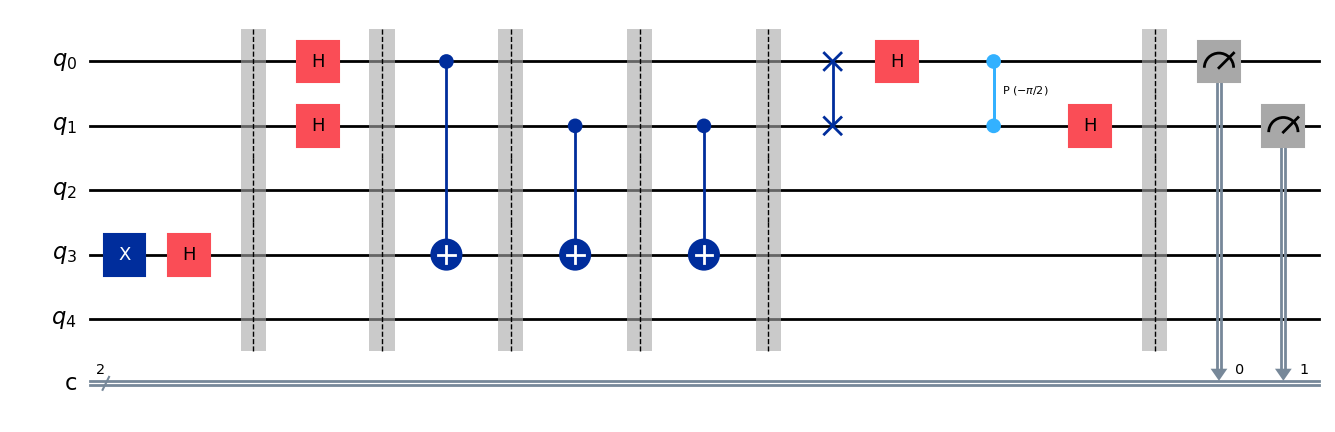

In [8]:
from qiskit import QuantumCircuit
from math import pi


qc = QuantumCircuit(2 + 3, 2)

# Prepare input eigenvector
# qc.h(3) # 0+0
qc.x(3) # 0-0
qc.h(3) # 0-0
qc.barrier()

# Control qubit hadamards
qc.h(0)
qc.h(1)
qc.barrier()

# Add controlled M
for a in range(2): # m = 2
    for b in range(2**a):
        qc.cx(a, 3)
        qc.barrier()

# Inverse Fourier
qc.swap(0, 1)
qc.h(0)
qc.cp(-pi / 2, 0, 1)
qc.h(1)
qc.barrier()

# Measure
qc.measure([0, 1], [0, 1])

qc.draw("mpl")

C:\Users\Plasc\AppData\Local\Temp\ipykernel_2728\1620494913.py:5: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  result = Sampler().run(qc).result()


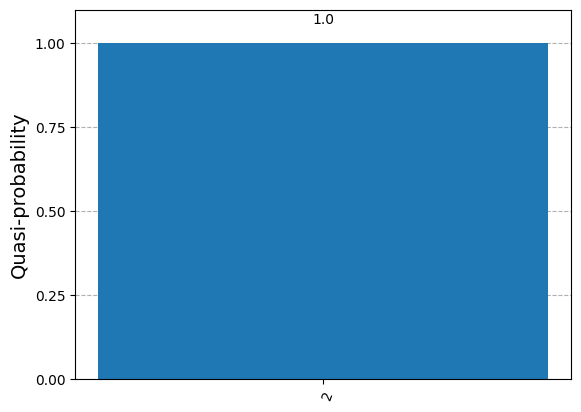

In [9]:
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler


result = Sampler().run(qc).result()
display(plot_histogram(result.quasi_dists))

## O1

In [10]:
import math
from sympy import Matrix


def M_a(N, a):
    n = math.ceil(math.log2(N)) # n - input qubits amount to M_a

    M_a = Matrix.zeros(2**n, 2**n) # 2**n X 2**n
    for x in range(2**n):
        if x >= N:
            M_a[x, x] = 1
        else:
            result = (x * a) % N
            M_a[result, x] = 1
    
    return M_a

test = Matrix([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

# M_a(7, 2) * test
# M_a(15, 4) * test
# M_a(15, 4)
M_a(4, 3)

Matrix([
[1, 0, 0, 0],
[0, 0, 0, 1],
[0, 0, 1, 0],
[0, 1, 0, 0]])

## ShA

In [11]:
import numpy as np
from qiskit.circuit.library import UnitaryGate

a = 2
N = 21

def c_amod_N(a):
    if math.gcd(a, N) != 1:
        raise ValueError(f"'a' must not have common factors with {N}")

    M = M_a(N, a)

    M_np = np.array(M, dtype=complex)
    U = UnitaryGate(M_np)
    U.name = f"{a} mod {N}"

    c_U = U.control()
    return c_U

In [12]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT
from qiskit.primitives import Sampler


def phase_estimation(
        controlled_operation: QuantumCircuit,
        psi_prep: QuantumCircuit,
        precision: int
    ):
    """
    Carry out phase estimation on a simulator.
    Args:
        controlled_operation: The operation to perform phase estimation on,
                              controlled by one qubit.
        psi_prep: Circuit to prepare |ψ>
        precision: Number of counting qubits to use
    Returns:
        float: Best guess for phase of U|ψ>
    """
    control_register = QuantumRegister(precision)
    output_register = ClassicalRegister(precision)

    target_register = QuantumRegister(psi_prep.num_qubits)
    qc = QuantumCircuit(control_register, target_register, output_register)

    # Prepare |ψ>
    qc.compose(psi_prep,
               qubits=target_register,
               inplace=True)

    # Do phase estimation
    for index, qubit in enumerate(control_register):
        qc.h(qubit)
        for _ in range(2**index):
            qc.compose(
                controlled_operation,
                qubits=[qubit] + list(target_register),
                inplace=True,
            )

    qc.compose(
        QFT(precision, inverse=True),
        qubits=control_register,
        inplace=True
    )

    qc.measure(control_register, output_register)

    measurement = Sampler().run(qc, shots=1).result().quasi_dists[0].popitem()[0]
    return measurement / 2**precision

In [13]:
psi_prep = QuantumCircuit(math.ceil(math.log2(N)))
psi_prep.x(0)
display(psi_prep.draw())

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────

In [14]:
from fractions import Fraction
from math import gcd

# a = 2
# N = 21

FACTOR_FOUND = False
ATTEMPT = 0
while not FACTOR_FOUND:
    ATTEMPT += 1
    print(f"\nAttempt {ATTEMPT}")

    phase = phase_estimation(
        c_amod_N(a),
        psi_prep,
        precision=5
    )
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator
    if phase != 0:
        # Guess for a factor is gcd(x^{r/2} - 1 , 15)
        guess = gcd(a ** (r // 2) - 1, N)
        if guess not in [1, N] and (N % guess) == 0:
            # Guess is a factor!
            print(f"Non-trivial factor found: {guess}")
            FACTOR_FOUND = True


Attempt 1


C:\Users\Plasc\AppData\Local\Temp\ipykernel_2728\1461470982.py:50: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  measurement = Sampler().run(qc, shots=1).result().quasi_dists[0].popitem()[0]



Attempt 2
Non-trivial factor found: 3


# GrA

In [15]:
# To be continued...